In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [2]:
it_df = pd.read_csv('data/6_classes_no_names.csv', sep=',')
it_df

,full_name,name,event_time,full_description,description,city,category,class
0,Встреча в IT-баре KLЮTCH,встреча it бар klюtch,2014-01-31 16:00:00+00,Соберемся первый раз в 2014-м году и поговорим...,собраться первый м поговорить нелёгкий девопёс...,St. Petersburg,Tech,devops
1,"Встреча в DataArt, Go в гостях у DevOps-40",встреча dataart go гость devops,2014-03-27 14:00:00+00,Совместная встреча питерских Go и DevOps групп...,совместный go devops группа слово рассказать и...,St. Petersburg,Tech,devops
2,"Встреча в DataArt, ""Повторяемость по-питерски""",встреча dataart повторяемость питерски,2014-04-29 15:00:00+00,Я не был на московском DevOps-митапе в Яндексе...,devops митапа яндекс холодно ехать смотреть вы...,St. Petersburg,Tech,devops
3,Piter United - глобальная встреча питерских со...,piter united глобальный встреча питерский сооб...,2014-05-30 10:00:00+00,http://piter-united.ru/ - глобальный сбор всех...,глобальный сбор сообщество программа островок ...,St. Petersburg,Tech,devops
4,DevOps-40 в гостях у SPbLUG,devops гость spblug,2014-06-25 15:00:00+00,"Митап пройдет совместно с SPbLUG в центре ""Фен...",митапа пройти совместно spblug центр spblug тр...,St. Petersburg,Tech,devops
...,...,...,...,...,...,...,...,...
253,Data Webinar,data webinar,2020-10-15 15:00:00+00,15 октября приглашаем на Data Webinar! Вебинар...,data webinar вебинар интересный специалист big...,Без города,Tech,ds
254,Data Quality Meetup #2,data quality meetup,2020-10-21 16:00:00+00,21 октября приглашаем на 2-й Data Quality Onli...,й data quality online meetup data quality engi...,Без города,Tech,ds
255,"Online hour with expert ""Каково это — быть тим...",online hour with expert каков быть тимлидом м,2020-10-21 16:00:00+00,DataArt приглашает на встречу технического соо...,dataart технический сообщество it talk формат ...,Без города,Tech,busorg
256,Webinar for juniors Izhevsk #2,webinar for juniors izhevsk,2020-10-22 14:00:00+00,Только начинаете карьеру в IT и хотите получит...,начинать карьера it хотеть получить полезный з...,Без города,Tech,web


In [3]:
X = it_df['description'].to_numpy()
y = it_df['class'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=19)

In [4]:
vectorizer = TfidfVectorizer(sublinear_tf=False, max_df=0.5, max_features=42, stop_words='english')
X_train = vectorizer.fit_transform(x_train)

In [5]:
print(y_test)
print(y_train)

['mobile' 'busorg' 'busorg' 'busorg' 'busorg' 'qa' 'qa' 'mobile' 'ds'
 'devops' 'ds' 'ds' 'busorg' 'qa' 'busorg' 'busorg' 'busorg' 'web' 'ds'
 'devops' 'ds' 'busorg' 'qa' 'devops' 'busorg' 'ds' 'busorg' 'devops'
 'busorg' 'busorg' 'web' 'busorg' 'busorg' 'busorg' 'devops' 'busorg'
 'devops' 'devops' 'busorg' 'ds' 'ds' 'devops' 'busorg' 'devops' 'devops'
 'busorg' 'ds' 'mobile' 'mobile' 'busorg' 'mobile' 'web']
['qa' 'ds' 'web' 'busorg' 'qa' 'ds' 'devops' 'qa' 'ds' 'mobile' 'web' 'ds'
 'busorg' 'ds' 'ds' 'ds' 'mobile' 'devops' 'busorg' 'web' 'web' 'devops'
 'web' 'devops' 'busorg' 'devops' 'mobile' 'ds' 'qa' 'devops' 'busorg'
 'mobile' 'ds' 'devops' 'mobile' 'devops' 'web' 'busorg' 'devops' 'ds'
 'busorg' 'busorg' 'busorg' 'devops' 'devops' 'ds' 'mobile' 'busorg' 'web'
 'devops' 'busorg' 'mobile' 'devops' 'web' 'mobile' 'web' 'ds' 'qa'
 'busorg' 'mobile' 'web' 'mobile' 'mobile' 'devops' 'devops' 'qa' 'qa'
 'ds' 'mobile' 'busorg' 'web' 'mobile' 'devops' 'mobile' 'busorg' 'devops'
 'devop

In [6]:
feature_names = np.array(vectorizer.get_feature_names())

target_names = [['ds'], ['mobile'],['qa'], ['web'], ['devops'], ['busorg']]

In [7]:
feature_names

array(['android', 'data', 'devops', 'kotlin', 'meetup', 'бизнес',
       'возможный', 'дать', 'доклад', 'задача', 'инструмент',
       'использование', 'использовать', 'код', 'команда', 'компания',
       'мероприятие', 'митапа', 'опыт', 'офис', 'первый', 'приложение',
       'пример', 'проблема', 'программа', 'продукт', 'проект', 'пройти',
       'работать', 'разработка', 'разработчик', 'рассказать', 'решение',
       'система', 'сообщество', 'специалист', 'тестирование',
       'технология', 'участие', 'хотеть', 'человек', 'язык'], dtype='<U13')

In [8]:
X_test = vectorizer.transform(x_test)

In [9]:
def trim(s):
    return s if len(s) <= 80 else s[:150] + "..."

MultinomialNB
cross_val_score_mean:  0.732843137254902
              precision    recall  f1-score   support

      busorg       0.71      0.77      0.74        53
      devops       0.72      0.81      0.76        36
          ds       0.69      0.72      0.71        40
      mobile       0.84      0.87      0.85        30
          qa       0.93      0.61      0.74        23
         web       0.60      0.50      0.55        24

    accuracy                           0.73       206
   macro avg       0.75      0.71      0.72       206
weighted avg       0.74      0.73      0.73       206



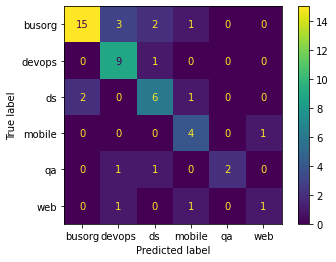

['ds']: опыт продукт митапа компания человек хотеть бизнес команда возможный проект...
['mobile']: технология программа система пройти митапа рассказать сообщество опыт доклад devops...
['qa']: разработка система программа специалист meetup задача рассказать дать доклад data...
['web']: мероприятие код офис пройти разработчик доклад разработка приложение kotlin android...
['devops']: meetup участие проект опыт сообщество программа инструмент компания доклад тестирование...
['busorg']: компания технология использование программа участие разработка разработчик приложение рассказать доклад...


In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict

mdl = MultinomialNB(alpha=.01)
print("MultinomialNB")
scores = cross_val_score(mdl, X_train, y_train, cv=4)
print("cross_val_score_mean: ", np.mean(scores))
y_pred = cross_val_predict(mdl, X_train, y_train, cv=4)
print(metrics.classification_report(y_train, y_pred))
mdl.fit(X_train,y_train)
metrics.plot_confusion_matrix(mdl, X_test, y_test)
plt.show()
for i, label in enumerate(target_names):
    top10 = np.argsort(mdl.coef_[i])[-10:]
    print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))

BernoulliNB
cross_val_score_mean:  0.679392911010558
              precision    recall  f1-score   support

      busorg       0.70      0.74      0.72        53
      devops       0.80      0.78      0.79        36
          ds       0.67      0.80      0.73        40
      mobile       0.67      0.67      0.67        30
          qa       0.81      0.57      0.67        23
         web       0.38      0.33      0.36        24

    accuracy                           0.68       206
   macro avg       0.67      0.65      0.65       206
weighted avg       0.68      0.68      0.68       206



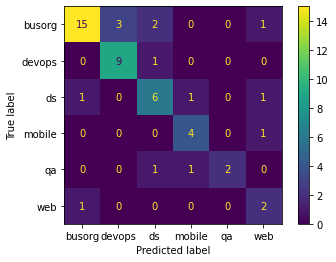

['ds']: рассказать возможный митапа компания пройти бизнес человек хотеть проект команда...
['mobile']: пройти мероприятие митапа компания проект опыт сообщество рассказать доклад devops...
['qa']: компания специалист meetup митапа задача программа дать рассказать доклад data...
['web']: kotlin пройти офис мероприятие рассказать приложение разработчик разработка доклад android...
['devops']: система инструмент рассказать сообщество участие программа опыт компания доклад тестирование...
['busorg']: использование технология митапа участие программа разработка приложение разработчик рассказать доклад...


In [11]:
mdl = BernoulliNB(alpha=.01)
print("BernoulliNB")
scores = cross_val_score(mdl, X_train, y_train, cv=4)
print("cross_val_score_mean: ", np.mean(scores))
y_pred = cross_val_predict(mdl, X_train, y_train, cv=4)
print(metrics.classification_report(y_train, y_pred))
mdl.fit(X_train,y_train)
metrics.plot_confusion_matrix(mdl, X_test, y_test)
plt.show()
for i, label in enumerate(target_names):
    top10 = np.argsort(mdl.coef_[i])[-10:]
    print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))

ComplementNB
cross_val_score_mean:  0.7185143288084465
              precision    recall  f1-score   support

      busorg       0.73      0.81      0.77        53
      devops       0.82      0.78      0.80        36
          ds       0.71      0.68      0.69        40
      mobile       0.74      0.87      0.80        30
          qa       0.69      0.78      0.73        23
         web       0.43      0.25      0.32        24

    accuracy                           0.72       206
   macro avg       0.69      0.69      0.69       206
weighted avg       0.70      0.72      0.71       206



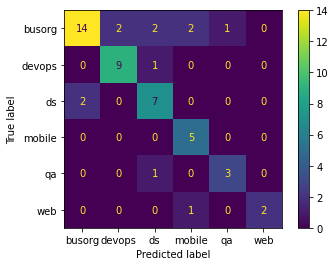

['ds']: использовать код проблема команда язык бизнес хотеть продукт человек возможный...
['mobile']: система kotlin инструмент задача код технология проблема использовать язык devops...
['qa']: kotlin система специалист использовать код решение проблема язык задача data...
['web']: приложение офис проблема решение задача использовать код язык kotlin android...
['devops']: первый технология решение код проблема kotlin инструмент использовать язык тестирование...
['busorg']: инструмент задача пример первый технология проблема использовать kotlin язык код...


In [12]:
mdl = ComplementNB(alpha=.1)
print("ComplementNB")
scores = cross_val_score(mdl, X_train, y_train, cv=4)
print("cross_val_score_mean: ", np.mean(scores))
y_pred = cross_val_predict(mdl, X_train, y_train, cv=4)
print(metrics.classification_report(y_train, y_pred))
mdl.fit(X_train,y_train)
metrics.plot_confusion_matrix(mdl, X_test, y_test)
plt.show()
for i, label in enumerate(target_names):
    top10 = np.argsort(mdl.coef_[i])[-10:]
    print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))

KNeighborsClassifier
cross_val_score_mean:  0.7472662141779789
              precision    recall  f1-score   support

      busorg       0.70      0.85      0.77        53
      devops       0.82      0.78      0.80        36
          ds       0.71      0.75      0.73        40
      mobile       0.82      0.90      0.86        30
          qa       0.89      0.74      0.81        23
         web       0.50      0.29      0.37        24

    accuracy                           0.75       206
   macro avg       0.74      0.72      0.72       206
weighted avg       0.74      0.75      0.74       206



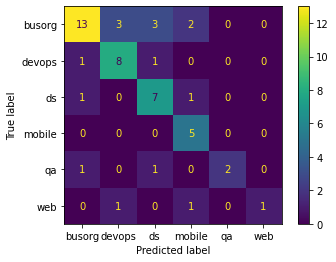

In [13]:
mdl = KNeighborsClassifier(n_neighbors=14)
print("KNeighborsClassifier")
scores = cross_val_score(mdl, X_train, y_train, cv=4)
print("cross_val_score_mean: ", np.mean(scores))
y_pred = cross_val_predict(mdl, X_train, y_train, cv=4)
print(metrics.classification_report(y_train, y_pred))
mdl.fit(X_train,y_train)
metrics.plot_confusion_matrix(mdl, X_test, y_test)
plt.show()

RandomForestClassifier
cross_val_score_mean:  0.7765837104072398
              precision    recall  f1-score   support

      busorg       0.69      0.83      0.75        53
      devops       1.00      0.86      0.93        36
          ds       0.70      0.75      0.72        40
      mobile       0.96      0.80      0.87        30
          qa       0.90      0.83      0.86        23
         web       0.45      0.42      0.43        24

    accuracy                           0.77       206
   macro avg       0.78      0.75      0.76       206
weighted avg       0.78      0.77      0.77       206



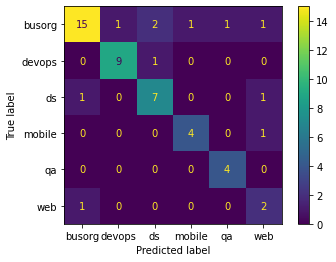

In [14]:
mdl = RandomForestClassifier()
print("RandomForestClassifier")
scores = cross_val_score(mdl, X_train, y_train, cv=4)
print("cross_val_score_mean: ", np.mean(scores))
y_pred = cross_val_predict(mdl, X_train, y_train, cv=4)
print(metrics.classification_report(y_train, y_pred))
mdl.fit(X_train,y_train)
metrics.plot_confusion_matrix(mdl, X_test, y_test)
plt.show()